# KAIM Week 1 Challenges Task 1

## Business Objective

**Nova Financial Solutions** aims to enhance its predictive analytics capabilities to significantly boost its financial forecasting accuracy and operational efficiency through advanced data analysis. As a Data Analyst at Nova Financial Solutions,  your primary task is to conduct a rigorous analysis of the financial news dataset. The focus of your analysis should be two-fold:

*     **Sentiment Analysis:** Perform sentiment analysis on the ‘headline’ text to quantify the tone and sentiment expressed in financial news. This will involve using natural language processing (NLP) techniques to derive sentiment scores, which can be associated with the respective 'Stock Symbol' to understand the emotional context surrounding stock-related news.
*     **Correlation Analysis:** Establish statistical correlations between the sentiment derived from news articles and the corresponding stock price movements. This involves tracking stock price changes around the date the article was published and analyzing the impact of news sentiment on stock performance. This analysis should consider the publication date and potentially the time the article was published if such data can be inferred or is available.

Your recommendations should leverage insights from this sentiment analysis to suggest investment strategies. These strategies should utilize the relationship between news sentiment and stock price fluctuations to predict future movements. The final report should provide clear, actionable insights based on your analysis, offering innovative strategies to use news sentiment as a predictive tool for stock market trends.


## Dataset Overview

### Financial News and Stock Price Integration Dataset

**FNSPID (Financial News and Stock Price Integration Dataset)**, is a comprehensive financial dataset designed to enhance stock market predictions by combining quantitative and qualitative data.

- The structure of the [data](https://drive.google.com/file/d/1tLHusoOQOm1cU_7DtLNbykgFgJ_piIpd/view?usp=drive_link) is as follows
    - `headline`: Article release headline, the title of the news article, which often includes key financial actions like stocks hitting highs, price target changes, or company earnings.
    - `url`: The direct link to the full news article.
    - `publisher`: Author/creator of article.
    - `date`: The publication date and time, including timezone information(UTC-4 timezone).
    - `stock`: Stock ticker symbol (unique series of letters assigned to a publicly traded company). For example (AAPL: Apple)

### Deliverables and Tasks to be done

**Task 1:**

- Git and GitHub
    - Tasks: 
        - Setting up Python environment
        - Git version control 
        - CI/CD 
- Key Performance Indicators (KPIs):
    - Dev Environment Setup.
    - Relevant skill in the area demonstrated.


### Minimum Essential To Do

- Create a github repository that you will be using to host all the code for this week.
- Create at least one new branch called ”task-1” for your analysis
- Commit your work at least three times a day with a descriptive commit message
- Perform Exploratory Data Analysis (EDA) analysis on the following:
    - **Descriptive Statistics:**
        - Obtain basic statistics for textual lengths (like headline length).
        - Count the number of articles per publisher to identify which publishers are most active.
        - Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.
    - **Text Analysis(Sentiment analysis & Topic Modeling):**
        - Perform sentiment analysis on headlines to gauge the sentiment (positive, negative, neutral) associated with the news.
        - Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).
    - **Time Series Analysis:**
        - How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?
        - Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.
    - **Publisher Analysis:**
        - Which publishers contribute most to the news feed? Is there a difference in the type of news they report?
        - If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import nltk

%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

#### Load the dataset into a pandas DataFrame

In [3]:
data = pd.read_csv('/kaggle/input/kaim-w1/raw_analyst_ratings/raw_analyst_ratings.csv')

In [4]:
data.shape

(1407328, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [6]:
data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

**No missing data**

# EDA

In [7]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Let's drop the first column since it is not necessary.

In [8]:
data = data.drop(data.columns[0], axis=1)
data.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [9]:
data.describe()

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


In [10]:
print("Number of stocks: ", len(data['stock'].unique()))
print("Number of publishers: ", len(data['publisher'].unique()))
print("Number of urls: ", len(data['url'].unique()))
print("Number of dates: ", len(data['date'].unique()))
print("Number of headline: ", len(data['headline'].unique()))

Number of stocks:  6204
Number of publishers:  1034
Number of urls:  883429
Number of dates:  39957
Number of headline:  845770



### **1. Descriptive Statistics**

#### Textual Lengths

In [11]:
# Calculate the length of headlines and obtain basic statistics:
data['headline_length'] = data['headline'].apply(len)
data['headline_length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

#### Number of Articles per Publisher

In [12]:
# Count articles per publisher
publisher_counts = data['publisher'].value_counts()
publisher_counts

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64

In [13]:
# Let's print the top 10
publisher_counts.head(10)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

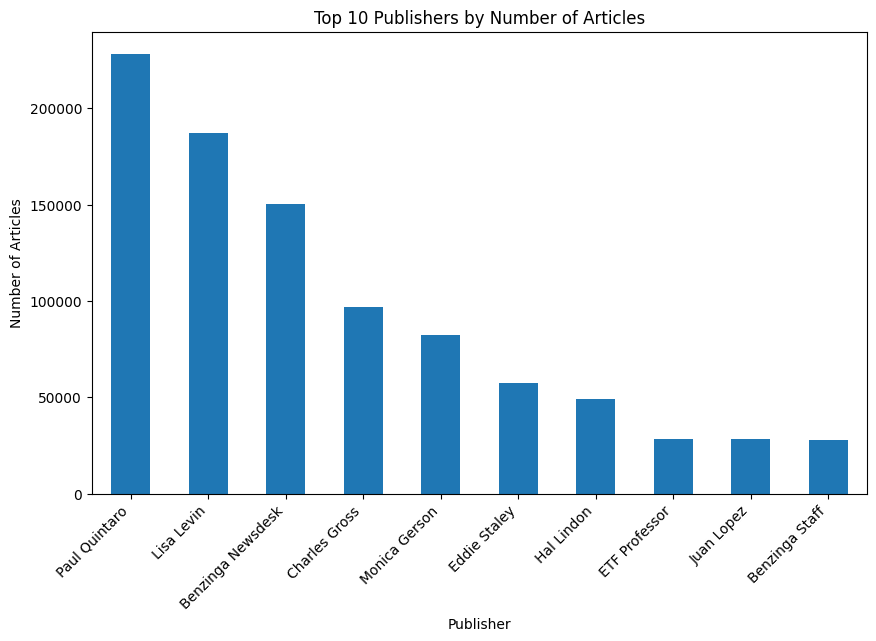

In [14]:
# Plotting

top_10_publishers = publisher_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_publishers.plot(kind='bar')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Publication Dates

In [15]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [16]:
# Split the 'date' column into separate year, month, day columns
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Split the 'date' column into separate hour, minute, second columns
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data['second'] = data['date'].dt.second

# Display the updated DataFrame
data.head()


,headline,url,publisher,date,stock,headline_length,year,month,day,hour,minute,second
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020.0,6.0,5.0,10.0,30.0,54.0
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020.0,6.0,3.0,10.0,45.0,20.0
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020.0,5.0,26.0,4.0,30.0,7.0
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020.0,5.0,22.0,12.0,45.0,6.0
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020.0,5.0,22.0,11.0,38.0,59.0


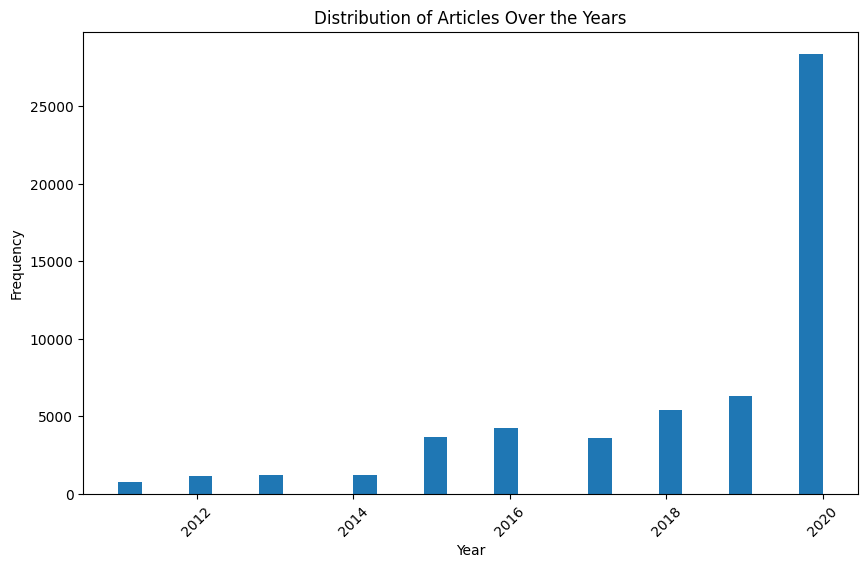

In [17]:
# Plot a histogram to visualize the distribution of articles over time
plt.figure(figsize=(10, 6))
data['year'].hist(bins=30)
plt.title('Distribution of Articles Over the Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

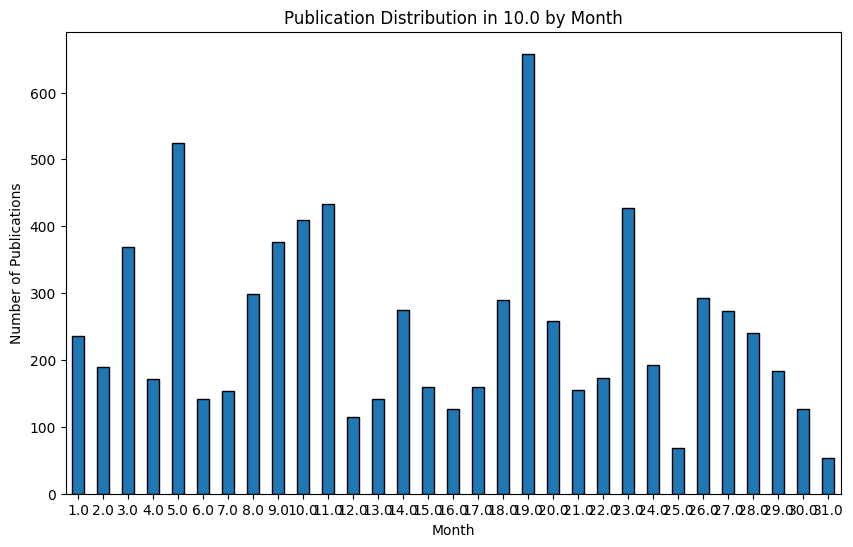

In [28]:
# Specify the year you're interested in (e.g., 2020)
year = 2020

# Filter the data for the specific year
year_data = data[data['year'] == year]

# Group by month and count the number of publications per month
monthly_publications = year_data.groupby('month').size()

# Plotting
plt.figure(figsize=(10, 6))
monthly_publications.plot(kind='bar', edgecolor='black')

# Adding titles and labels
plt.title(f'Publication Distribution in {year} by Month')
plt.xlabel('Month')
plt.ylabel('Number of Publications')
plt.xticks(rotation=0)  # Keep month labels horizontal

# Remove grid if desired
plt.grid(False)

# Show the plot
plt.show()

### **2. Text Analysis**

#### Sentiment Analysis

Let's performs sentiment analysis on the headlines in the `headline` column of the dataset by utilizing the `TextBlob` library. For each headline, it calculates a sentiment polarity score, which measures the emotional tone of the text on a scale from -1 (very negative) to 1 (very positive). The resulting sentiment scores are then stored in a new column named `sentiment`, enabling a quantitative assessment of the sentiment conveyed in each headline.

In [19]:
data['sentiment'] = data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [20]:
data.head()

,headline,url,publisher,date,stock,headline_length,year,month,day,hour,minute,second,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020.0,6.0,5.0,10.0,30.0,54.0,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020.0,6.0,3.0,10.0,45.0,20.0,0.0
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020.0,5.0,26.0,4.0,30.0,7.0,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020.0,5.0,22.0,12.0,45.0,6.0,0.0
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020.0,5.0,22.0,11.0,38.0,59.0,0.0


In [21]:
data['sentiment'].unique()

array([ 0.        ,  0.25      ,  0.75      , ..., -0.01111111,
        0.02708333, -0.12337662])

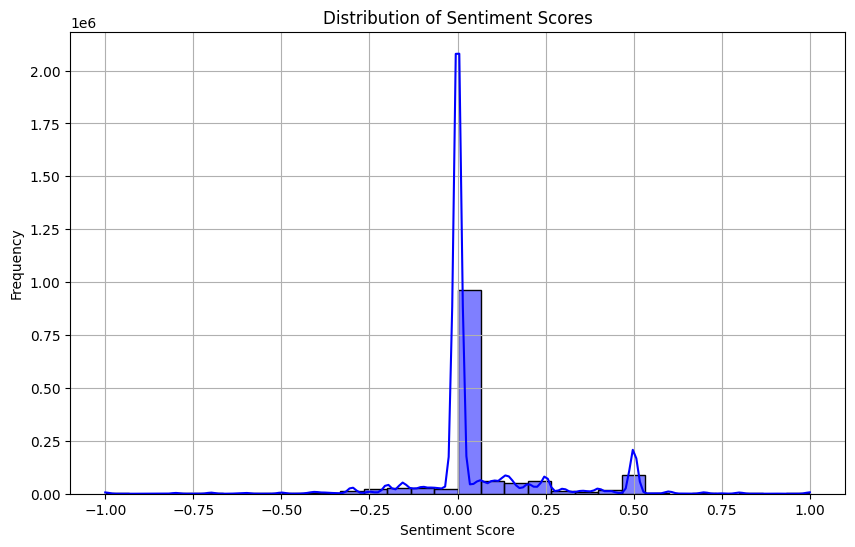

In [22]:
# Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, color='blue', kde=True)  
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()


In [23]:
# Filter headlines with positive sentiment
positive_headlines = data[data['sentiment'] > 0.5]

# Sort by sentiment score and select the top headlines
top_positive_headlines = positive_headlines.sort_values(by='sentiment', ascending=False).head(10)
top_positive_headlines

,headline,url,publisher,date,stock,headline_length,year,month,day,hour,minute,second,sentiment
1093723,The 10 Best ETF Tickers,https://www.benzinga.com/trading-ideas/long-id...,ETF Professor,2012-02-06 13:22:32-04:00,ROOF,23,2012.0,2.0,6.0,13.0,22.0,32.0,1.0
1040927,UPDATE: Perfect World to Acquire 30.32M Shares...,https://www.benzinga.com/news/14/04/4482745/up...,Charles Gross,NaT,PWRD,80,NaN,NaN,NaN,NaN,NaN,NaN,1.0
203291,"Tours4Fun Announces ""Best of Summer"" Travel Ph...",https://www.benzinga.com/09/08/2231/tours4fun-...,Benzinga Staff,NaT,CA,57,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1040948,Marbridge Reports Baidu Acquires Perfect World...,https://www.benzinga.com/news/13/11/4098520/ma...,Charles Gross,NaT,PWRD,68,NaN,NaN,NaN,NaN,NaN,NaN,1.0
203326,"""Stock Alert"" Traders Rejoice With Over 95% Pe...",https://www.benzinga.com/09/08/1450/stock-aler...,Benzinga Staff,NaT,CA,78,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1040946,"Perfect World Co., Ltd. Reports Q3 EPS of $0.4...",https://www.benzinga.com/news/earnings/13/11/4...,Paul Quintaro,NaT,PWRD,97,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1040945,"Perfect World Co., Ltd. Sees Q4 Sales RMB850.0...",https://www.benzinga.com/news/13/11/4107866/pe...,Paul Quintaro,NaT,PWRD,54,NaN,NaN,NaN,NaN,NaN,NaN,1.0
203914,Best Buy Names Cabela's CEO Tommy Millner to B...,https://www.benzinga.com/news/14/01/4223056/be...,Paul Quintaro,NaT,CAB,63,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1040932,"Perfect World Co., Ltd. Reports Q4 EPS of $0.5...",https://www.benzinga.com/news/earnings/14/03/4...,Paul Quintaro,NaT,PWRD,96,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1040931,"Perfect World Co., Ltd. Sees Q1 Sales RMB841.0...",https://www.benzinga.com/news/14/03/4379102/pe...,Paul Quintaro,NaT,PWRD,57,NaN,NaN,NaN,NaN,NaN,NaN,1.0


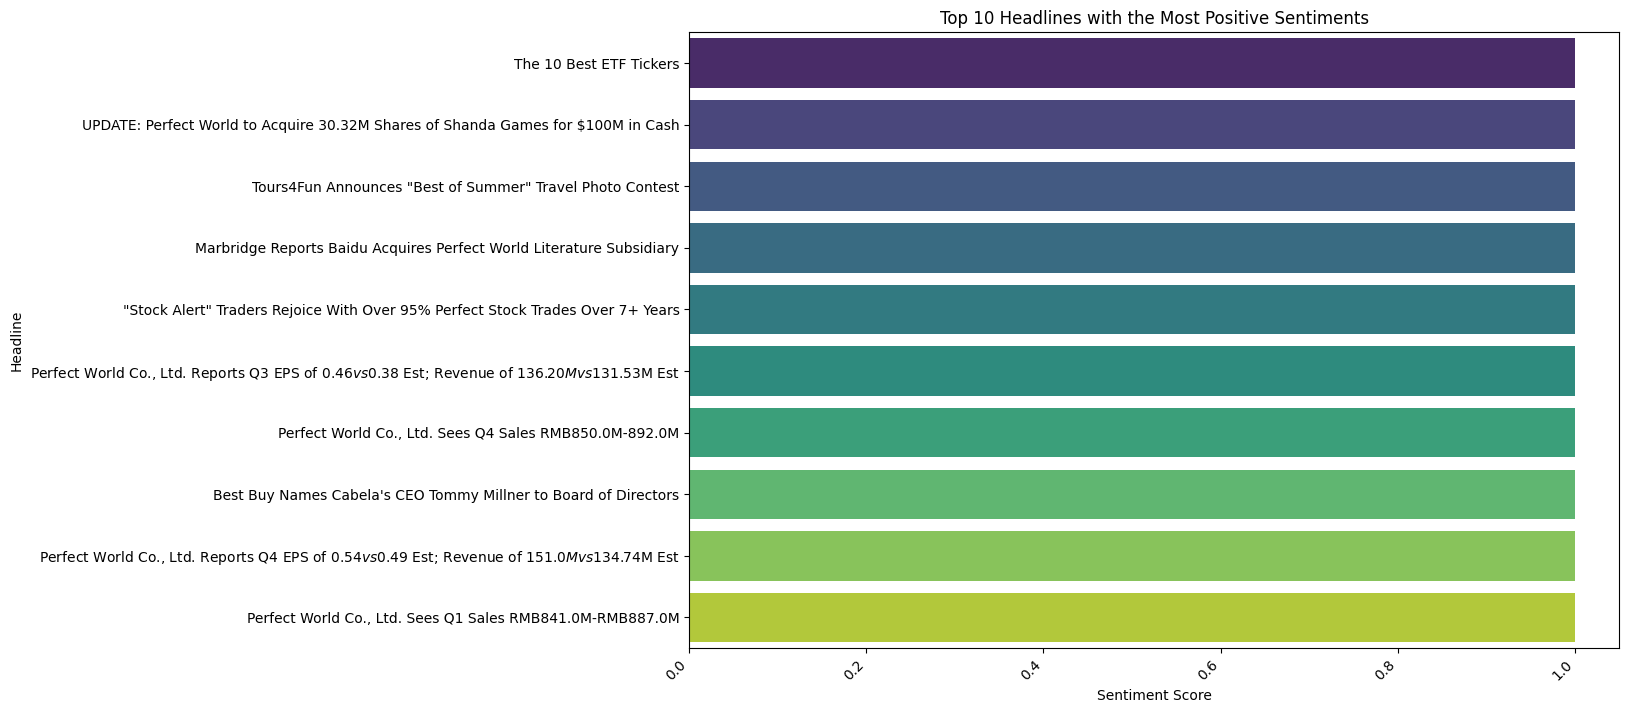

In [24]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_positive_headlines['sentiment'], y=top_positive_headlines['headline'], palette='viridis')
plt.title('Top 10 Headlines with the Most Positive Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Headline')
plt.xticks(rotation=45, ha='right')
plt.grid(False)  
plt.show()


In [25]:
# Filter headlines with positive sentiment
negative_headlines = data[data['sentiment'] < 0]

# Sort by sentiment score and select the top headlines
top_negative_headlines = negative_headlines.sort_values(by='sentiment', ascending=False).head(10)
top_negative_headlines

,headline,url,publisher,date,stock,headline_length,year,month,day,hour,minute,second,sentiment
449302,UPDATE: Unnamed White House Official Says US I...,https://www.benzinga.com/news/18/09/12390504/u...,Benzinga Newsdesk,NaT,EWC,173,NaN,NaN,NaN,NaN,NaN,NaN,-4.625929e-18
462970,UPDATE: Unnamed White House Official Says US I...,https://www.benzinga.com/news/18/09/12390504/u...,Benzinga Newsdesk,NaT,EWW,173,NaN,NaN,NaN,NaN,NaN,NaN,-4.625929e-18
868834,"Light, Slow & Choppy Action 09-08-2011",https://www.benzinga.com/trading-ideas/long-id...,optionsXpress,NaT,MU,38,NaN,NaN,NaN,NaN,NaN,NaN,-6.938894e-18
775844,"Light, Slow & Choppy Action 09-08-2011",https://www.benzinga.com/trading-ideas/long-id...,optionsXpress,NaT,LOW,38,NaN,NaN,NaN,NaN,NaN,NaN,-6.938894e-18
633482,"Light, Slow & Choppy Action 09-08-2011",https://www.benzinga.com/trading-ideas/long-id...,optionsXpress,NaT,HTZ,38,NaN,NaN,NaN,NaN,NaN,NaN,-6.938894e-18
203024,CA Technologies Wins Copyright Infringement an...,https://www.benzinga.com/news/12/03/2440639/ca...,Eddie Staley,NaT,CA,123,NaN,NaN,NaN,NaN,NaN,NaN,-6.938894e-18
1271055,"Light, Slow & Choppy Action 09-08-2011",https://www.benzinga.com/trading-ideas/long-id...,optionsXpress,NaT,TWX,38,NaN,NaN,NaN,NaN,NaN,NaN,-6.938894e-18
1324965,"Light, Slow & Choppy Action 09-08-2011",https://www.benzinga.com/trading-ideas/long-id...,optionsXpress,NaT,VTR,38,NaN,NaN,NaN,NaN,NaN,NaN,-6.938894e-18
1319734,"Light, Slow & Choppy Action 09-08-2011",https://www.benzinga.com/trading-ideas/long-id...,optionsXpress,NaT,VRSN,38,NaN,NaN,NaN,NaN,NaN,NaN,-6.938894e-18
726721,Kimberly-Clark shares are trading lower after ...,https://www.benzinga.com/markets/wiim/19/01/13...,Benzinga Newsdesk,NaT,KMB,161,NaN,NaN,NaN,NaN,NaN,NaN,-9.251859e-18


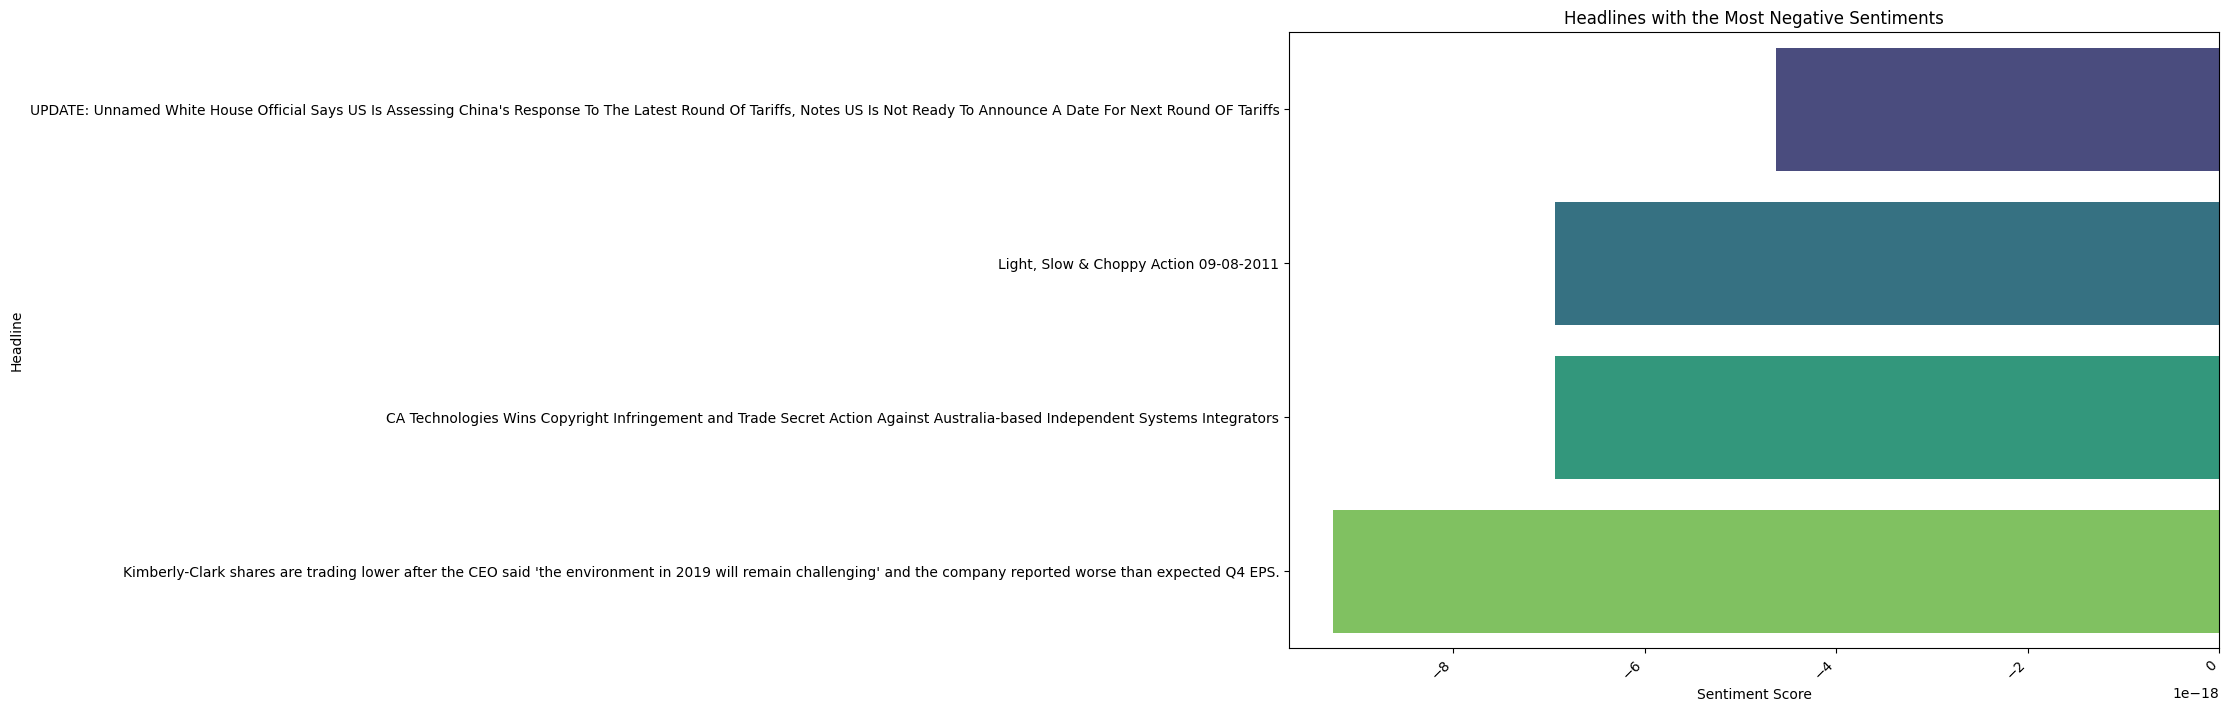

In [26]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_negative_headlines['sentiment'], y=top_negative_headlines['headline'], palette='viridis')
plt.title('Headlines with the Most Negative Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Headline')
plt.xticks(rotation=45, ha='right')
plt.grid(False)  
plt.show()


#### Topic Modeling

In [27]:
stop_words = set(stopwords.words('english'))
data['tokens'] = data['headline'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])


In [ ]:
dictionary = corpora.Dictionary(data['tokens'])
corpus = [dictionary.doc2bow(text) for text in data['tokens']]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = lda_model.print_topics()
for topic in topics:
    print(topic)

### Time Series Analysis

#### Publication Frequency

In [ ]:
# Analyze the frequency of articles over time:
data.set_index('date', inplace=True)
data.resample('D').size().plot()  

#### Publication Time

In [ ]:
# Extract and analyze the time of day for articles:
data['hour'] = data.index.hour
data['hour'].hist(bins=24)  # Histogram of articles by hour

### Publisher Analysis

#### Active Publishers

In [ ]:
# Identify the most active publishers:
publisher_counts = data['publisher'].value_counts()
print(publisher_counts.head(10)

#### Unique Domains

In [ ]:
# Extract domains from email addresses:
data['domain'] = data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else 'N/A')
domain_counts = data['domain'].value_counts()
print(domain_counts)